# Probability of Credit Card Default 

In this project, we will develop models that predict the probability of credit card default. We will use a dataset that consists of information for 30,000 customers, including whether they ended up defaulting the next month. We will perform exploratory data analysis to derive any important insights from the data that should improve the effectiveness of the models. After the models are developed, we’ll compare their performances and determine which has the most sufficient predictive power.

## Instructions
This project consists of the following subsections:

1. Import the required libraries and read in and clean the dataset

2. Exploratory Data Analysis

3. Pre-Processing

4. Develop machine learning models using the following to fit the data:
      * Logistic Regression
      * Decision Trees (Random Forest)
      * Naive Bayes
      * Neural Network Algorithm

5. Determine feature importance (within the ReadMe)

6. Model Evaluation (within the ReadMe)

## Step 1: Import Libraries and Read In & Clean the Data

#### First, import the required libraries. Then, read the 'default_credit_card_client.csv' data into a Pandas DataFrame and clean the data by skipping the first row and setting the "ID" column as the index. We will also change the name of two of the columns in the dataset to make it more orderly. Next we will check for any null values and remove them (if there are any). The last step in this section will be to examine the general statistics of the data we will be using.


In [1]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a Pandas DataFrame. Skip the first row of data and set the index as the "ID".
cc_info_df = pd.read_csv(Path("./default_credit_card_clients.csv"), skiprows=1, index_col="ID")
cc_info_df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'DEFAULT'}, inplace = True)

# Review the DataFrame
cc_info_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Check for null values
cc_info_df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [4]:
# View the general decription of the data
cc_info_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Step 2: Exploratory Data Analysis (EDA) 

#### In this section we will take a closer look at our data. We will initially separate the data into the target and features; the target variable will be "DEFAULT" and the features will be the other 23 independent variables. After the data is separated we will examine the distribution of and correlations between each variable, along with calculating the P-Values and the Variance Inflation Factor (VIF) to help determine multicollinearity.

In [5]:
# Separate the data into target and features

# Separate the y variable, the target
y = cc_info_df["DEFAULT"]

# Separate the X variable, the features
X = cc_info_df.drop(columns="DEFAULT")

In [6]:
# Check the balance of the target values
y.value_counts()

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

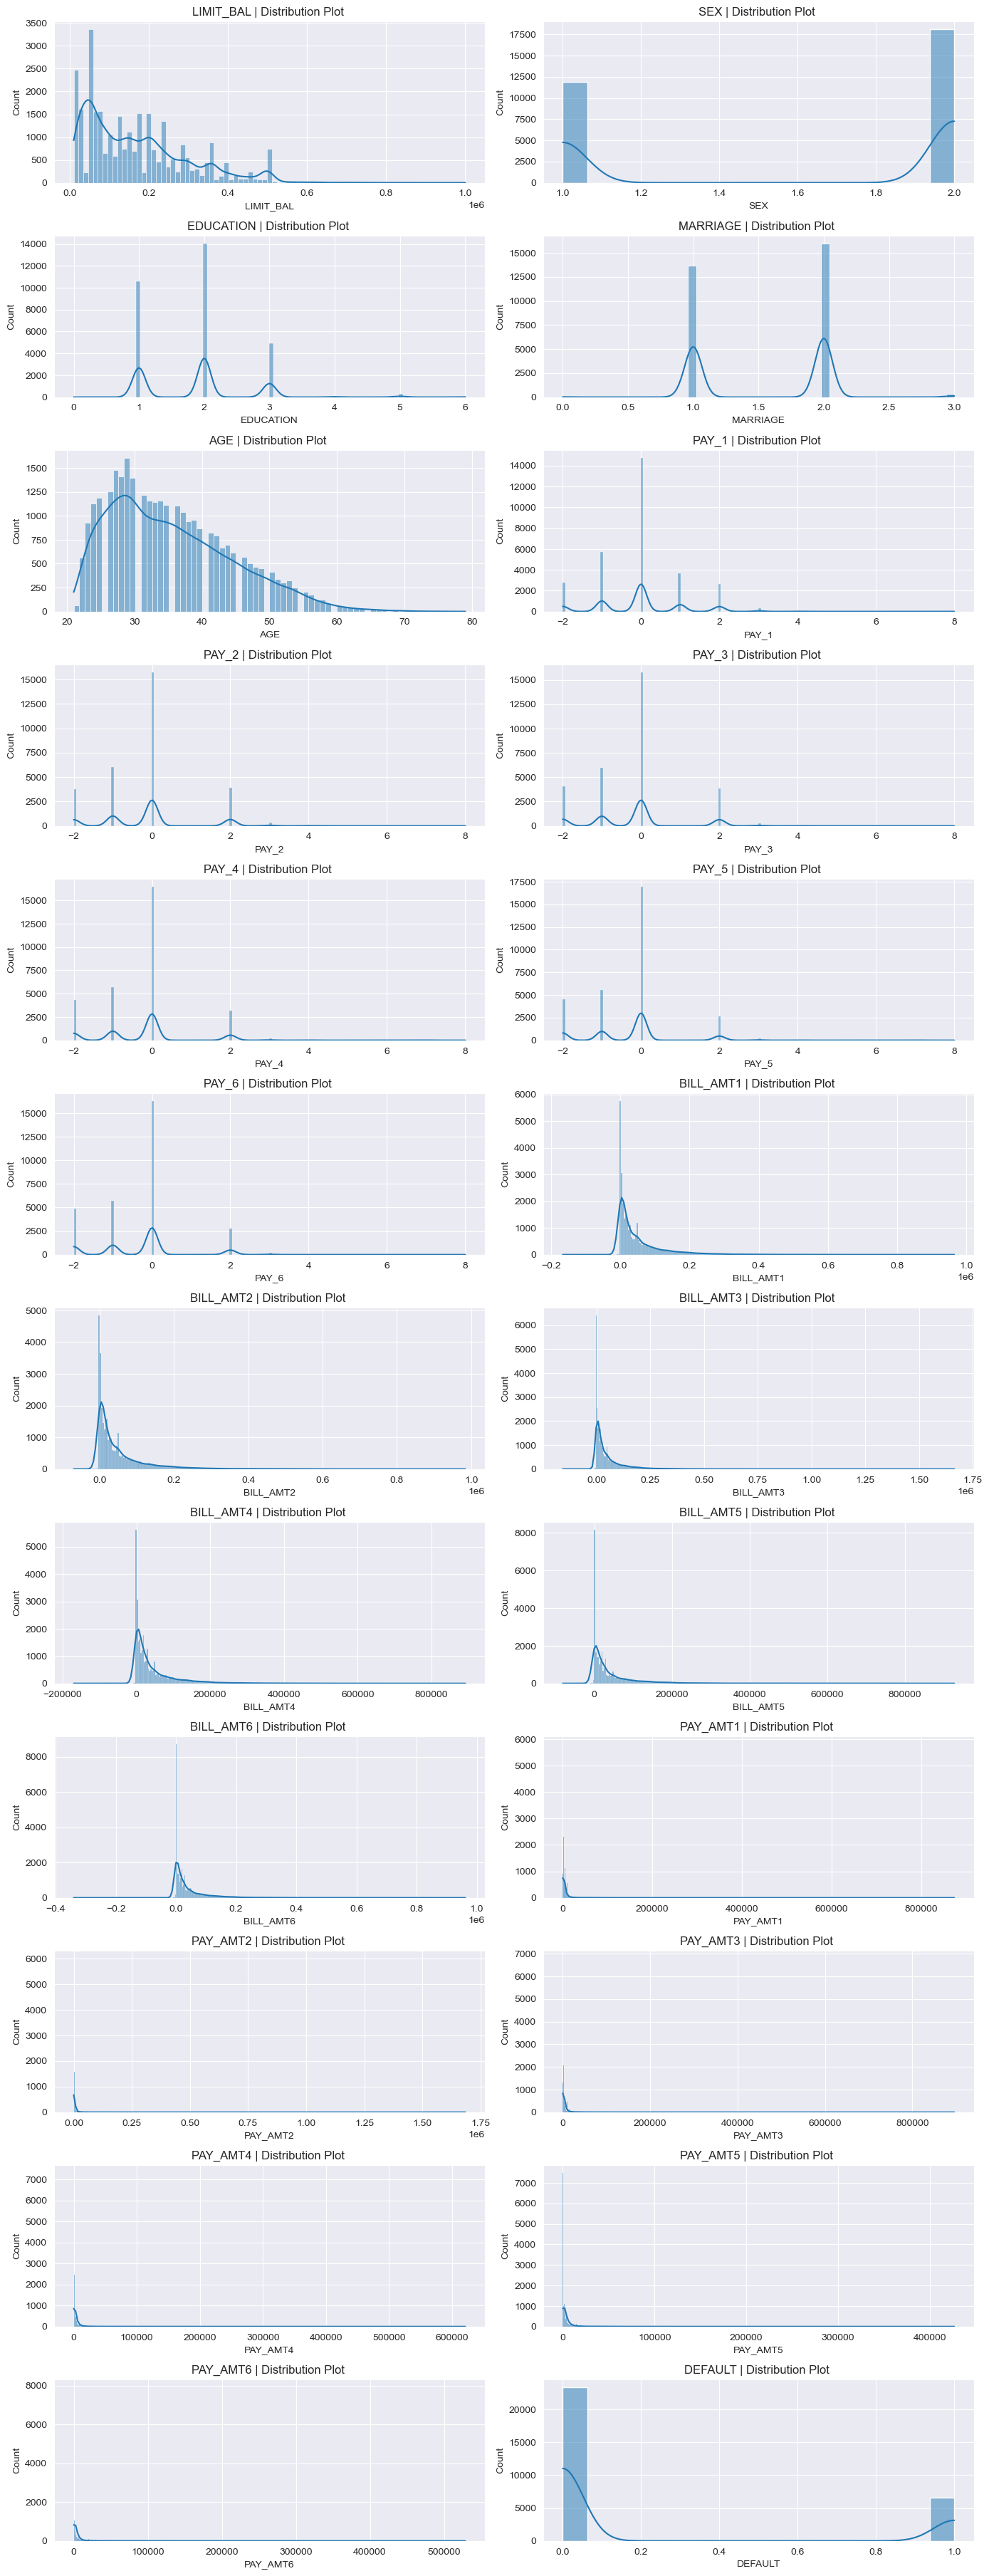

In [7]:
# Examine the distributions of each variable

# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = cc_info_df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(cc_info_df[feature], kde=True)
    plt.title(f"{feature} | Distribution Plot ")

# Adjust layout and show plots
plt.tight_layout()
plt.savefig('./Images/distribution_plots.png')

In [8]:
# Check the value counts for the 'MARRIAGE' variable
cc_info_df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [9]:
# Check the value counts for the 'EDUCATION' variable
cc_info_df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

### Clean the Data (Again)

#### Based on the distribution plots above, it seemed the 'MARRIAGE' and 'EDUCATION' variables had some extra categories, and this was confirmed by checking the value counts of those variables. 'MARRIAGE' should only have three categories for marital status (1 = married; 2 = single; 3 = others), therefore we will categorize all of the 0 as "others". Also, 'EDUCATION' should only have four categories (1 = graduate school; 2 = university; 3 = high school; 4 = others), thus we will categorize all of the 0, 5, and 6 as "others".

#### Additionally, according to the documentation we have for the dataset, the PAY_1-PAY_6 variables indicate the number of months that payments have been delayed, and specifies "pay duly" with -1. However, the documentation does not list -2 or 0 categories, yet we see those in the distribution plots. Since you cannot have a negative delayed payment we will categorize all of the -2, -1, and 0 as "pay duly", and adjust "pay duly" to be 0 instead of -1.

In [10]:
# Use the .loc function to locate the 0's in the 'MARRIAGE' variable and categorize them as 3
cc_info_df.loc[cc_info_df['MARRIAGE'] == 0, 'MARRIAGE'] = 3
cc_info_df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [11]:
# Use the .loc function to locate the 0, 5, and 6's in the 'EDUCATION' variable and categorize them as 4
cleaning = (cc_info_df['EDUCATION'] == 0) | (cc_info_df['EDUCATION'] == 5) | (cc_info_df['EDUCATION'] == 6)
cc_info_df.loc[cleaning, 'EDUCATION'] = 4
cc_info_df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [12]:
# Use the .loc function to locate the -2 and -1's in the 'PAY_1-PAY_6' variables and categorize them as 0
cleaning = (cc_info_df['PAY_1'] == -2) | (cc_info_df['PAY_1'] == -1)
cc_info_df.loc[cleaning, 'PAY_1'] = 0
cleaning = (cc_info_df['PAY_2'] == -2) | (cc_info_df['PAY_2'] == -1)
cc_info_df.loc[cleaning, 'PAY_2'] = 0
cleaning = (cc_info_df['PAY_3'] == -2) | (cc_info_df['PAY_3'] == -1)
cc_info_df.loc[cleaning, 'PAY_3'] = 0
cleaning = (cc_info_df['PAY_4'] == -2) | (cc_info_df['PAY_4'] == -1)
cc_info_df.loc[cleaning, 'PAY_4'] = 0
cleaning = (cc_info_df['PAY_5'] == -2) | (cc_info_df['PAY_5'] == -1)
cc_info_df.loc[cleaning, 'PAY_5'] = 0
cleaning = (cc_info_df['PAY_6'] == -2) | (cc_info_df['PAY_6'] == -1)
cc_info_df.loc[cleaning, 'PAY_6'] = 0

In [13]:
# Check the value counts for the 'PAY_1' variable to confirm that the -2 and -1 values have been categorized as 0
cc_info_df['PAY_1'].value_counts()

PAY_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

### Multivariate Analysis

#### Interactions between three or more variables in a dataset are simultaneously analyzed and interpreted.

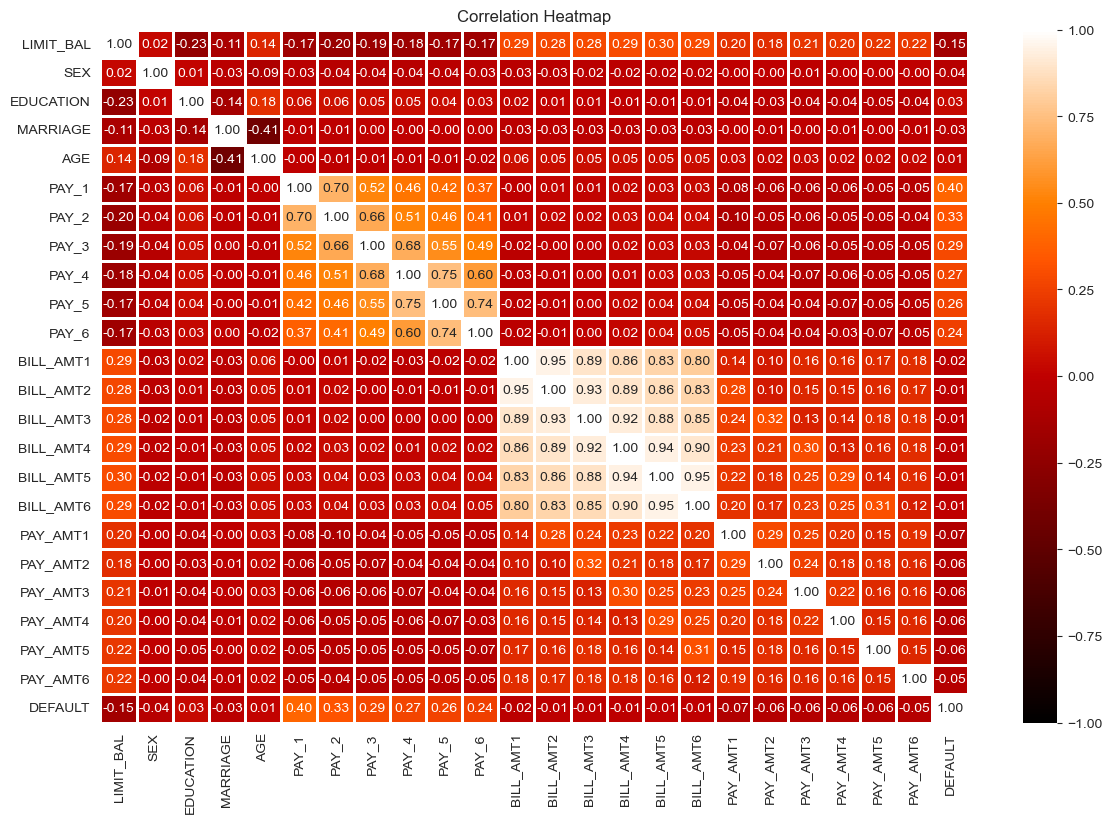

In [14]:
# Correlation matrix using a heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(cc_info_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# Save the matrix as a PNG
plt.savefig('./Images/correlation_heatmap.png')

### Bivariate Analysis
#### Two variables are examined simultaneously in order to look for patterns, dependencies, or interactions between them. Understanding how changes in one variable may correspond to changes in another requires the use of this statistical method.

0.9514836727518127


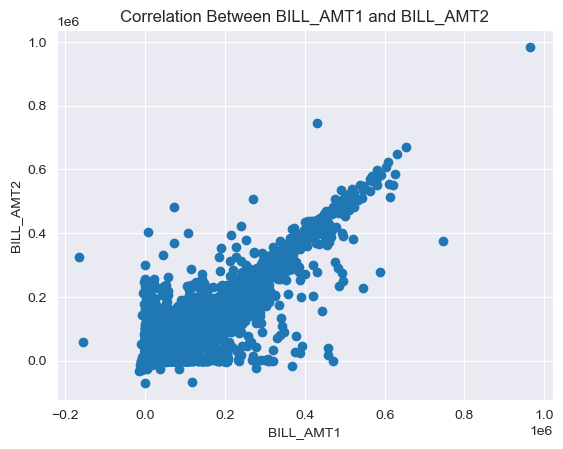

In [15]:
# Correlation between BILL_AMT1 and BILL_AMT2.
# The overall correlation matrix shows that these features are strongly correlated. We will visualize a scatterplot to view this correlation in a different way.
print(cc_info_df['BILL_AMT1'].corr(cc_info_df['BILL_AMT2']))

# Scatter plot comparing BILL_AMT1 and BILL_AMT2
plt.scatter(cc_info_df['BILL_AMT1'], cc_info_df['BILL_AMT2'])
plt.title("Correlation Between BILL_AMT1 and BILL_AMT2")
plt.xlabel("BILL_AMT1")
plt.ylabel("BILL_AMT2");

#### Ordinary Least Squares (OLS) Regression Summary

In [16]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                DEFAULT   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:29:38   Log-Likelihood:                -14202.
No. Observations:               30000   AIC:                         2.845e+04
Df Residuals:                   29976   BIC:                         2.865e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3142      0.018     17.541      0.0

#### Calculate the Variance Inflation Factor (VIF) to help determine multicollinearity

In [17]:
# Calculate the Variance Inflation Factor(VIF)
# Create the VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# Calculate VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

      feature        VIF
0   LIMIT_BAL   4.037479
1         SEX   9.092210
2   EDUCATION   6.731119
3    MARRIAGE   6.265388
4         AGE  10.857679
5       PAY_1   1.918276
6       PAY_2   3.211217
7       PAY_3   3.727427
8       PAY_4   4.440120
9       PAY_5   4.985856
10      PAY_6   3.463800
11  BILL_AMT1  20.823400
12  BILL_AMT2  38.214225
13  BILL_AMT3  31.783029
14  BILL_AMT4  29.548135
15  BILL_AMT5  35.986369
16  BILL_AMT6  21.426076
17   PAY_AMT1   1.907500
18   PAY_AMT2   2.384860
19   PAY_AMT3   1.911689
20   PAY_AMT4   1.805048
21   PAY_AMT5   1.854229
22   PAY_AMT6   1.270665


## Step 3: Pre-Processing

#### We prepare the data for our models in this section. This includes choosing the columns to be our independent variables. Since we determined that there was some strong multicollinearity between the six 'BILL_AMT' features, we will calculate the average of these six columns and replace the six columns with a single 'AVG_BILL_AMT' column. Once this is done we will split the data into training and testing sets and standardize them.

In [18]:
# Calculate the average of the 'BILL_AMT' columns and create a new column using this average.
# Then drop the 'BILL_AMT' columns from the DataFrame, leaving the new 'AVG_BILL_AMT' column.
cc_info_df['AVG_BILL_AMT'] = round(cc_info_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1), 2)
cc_info_df = cc_info_df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
cc_info_df = cc_info_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AVG_BILL_AMT', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']]
cc_info_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,AVG_BILL_AMT,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,0,1284.00,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,2,2846.17,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,16942.17,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,38555.67,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,0,18223.17,2000,36681,10000,9000,689,679,0


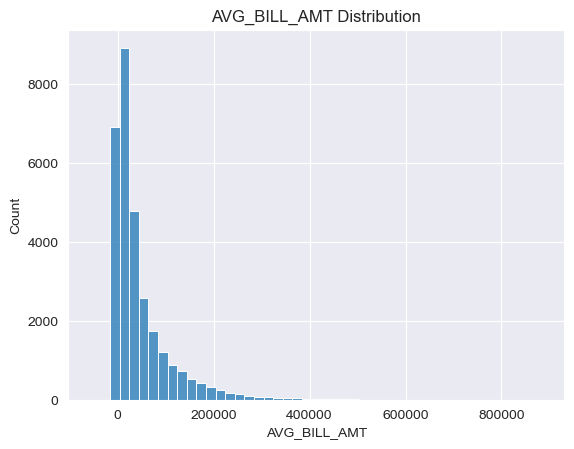

In [19]:
# Histogram of the 'AVG_BILL_AMT' feature in order to visualize the new, consolidated column.
sns.histplot(cc_info_df['AVG_BILL_AMT'], binwidth=20000).set(title="AVG_BILL_AMT Distribution");

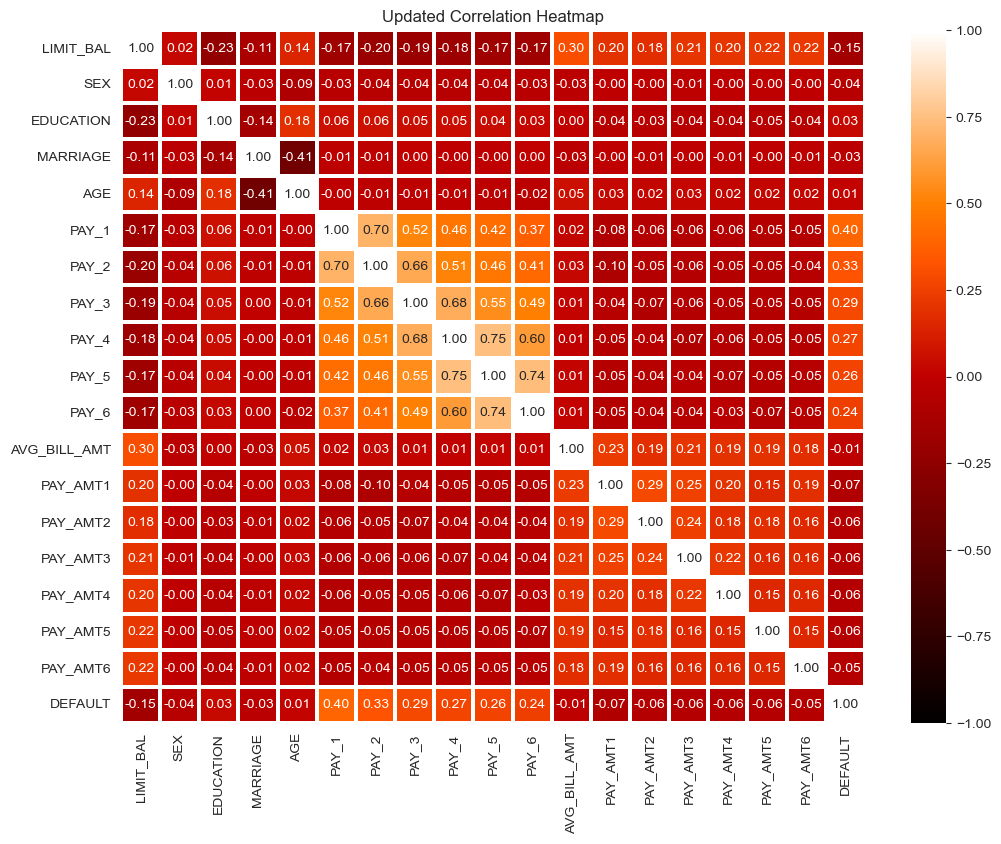

In [20]:
# Correlation matrix using the updated DataFrame.
# We consolidated the 'BILL_AMT' columns, therefore we want to visualize the correlations again to compare the results.
plt.figure(figsize=(12, 9))
sns.heatmap(cc_info_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=1.7, vmin=-1, vmax=1)
plt.title('Updated Correlation Heatmap')

# Save the updated matrix as a PNG
plt.savefig('./Images/updated_correlation_heatmap.png')

In [21]:
# Separate the updated DataFrame into target and features.
# Since we consolidated the 'BILL_AMT' columns the number of features has now changed.

# Separate the y variable, the target
y = cc_info_df["DEFAULT"]

# Separate the X variable, the features
X = cc_info_df.drop(columns="DEFAULT")

In [22]:
# Examine the OLS Regression Results using the updated DataFrame.
# We consolidated the 'BILL_AMT' columns, therefore we want to calculate the OLS again to compare the results.
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                DEFAULT   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     367.4
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:29:43   Log-Likelihood:                -13198.
No. Observations:               30000   AIC:                         2.643e+04
Df Residuals:                   29981   BIC:                         2.659e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2318      0.017     13.286   

In [23]:
# Updated VIF dataframe.
# We consolidated the 'BILL_AMT' columns, therefore we want to calculate the VIF again to compare the results.
updated_vif_data = pd.DataFrame() 
updated_vif_data["feature"] = X.columns 
  
# Calculating VIF for each feature 
updated_vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(updated_vif_data)

         feature        VIF
0      LIMIT_BAL   3.575118
1            SEX   9.109625
2      EDUCATION   7.358121
3       MARRIAGE   6.383264
4            AGE  11.286061
5          PAY_1   2.466168
6          PAY_2   3.035982
7          PAY_3   2.883782
8          PAY_4   3.309521
9          PAY_5   3.559007
10         PAY_6   2.513930
11  AVG_BILL_AMT   1.826487
12      PAY_AMT1   1.344371
13      PAY_AMT2   1.251961
14      PAY_AMT3   1.278934
15      PAY_AMT4   1.236339
16      PAY_AMT5   1.218856
17      PAY_AMT6   1.203389


## Step 4: Train and Test the Models

#### To start, we must split the data into training and testing sets, and then standardize them before building the models. After fitting and predicting for each model, we will visualize the results with classification reports, confusion matrixes, and also examining permutation feature importances.

In [24]:
# Split the DataFrame using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Model 1: Logistic Regression

In [26]:
# Instantiate the Logistic Regression model and assign a random_state parameter of 1
lr_model = LogisticRegression(random_state=1)

# Fit the model using the training data
lr_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
lr_prediction = lr_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Logistic Regression model
lr_acc_score = round(balanced_accuracy_score(y_test, lr_prediction), 2)
print(f"Logistic Regression Model Balanced Accuracy Score: {lr_acc_score}")

Logistic Regression Model Balanced Accuracy Score: 0.63



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      6730
           1       0.31      0.68      0.43       770

    accuracy                           0.81      7500
   macro avg       0.63      0.75      0.66      7500
weighted avg       0.89      0.81      0.84      7500



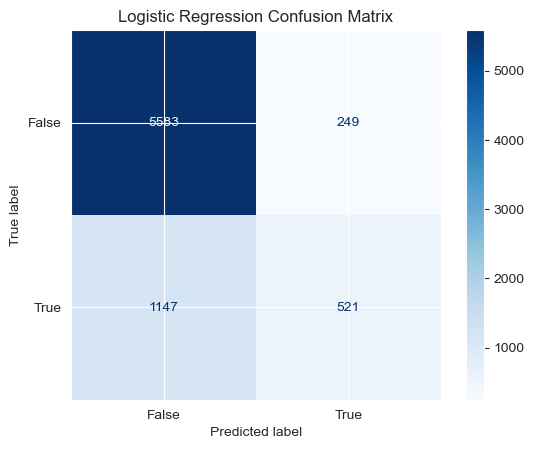

In [27]:
# Print the Confusion Matrix and the Classification Report for the Logistic Regression model
lr_confusion_matrix = confusion_matrix(y_test, lr_prediction)
lr_classification_report = classification_report(lr_prediction, y_test)
lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])
lr_cm_display.plot(cmap='Blues')
lr_cm_display.ax_.set_title("Logistic Regression Confusion Matrix")
print('\nLogistic Regression Classification Report:\n', lr_classification_report)

# Save the Confusion Matrix as a PNG
lr_cm_display.figure_.savefig('./Images/lr_confusion_matrix.png')

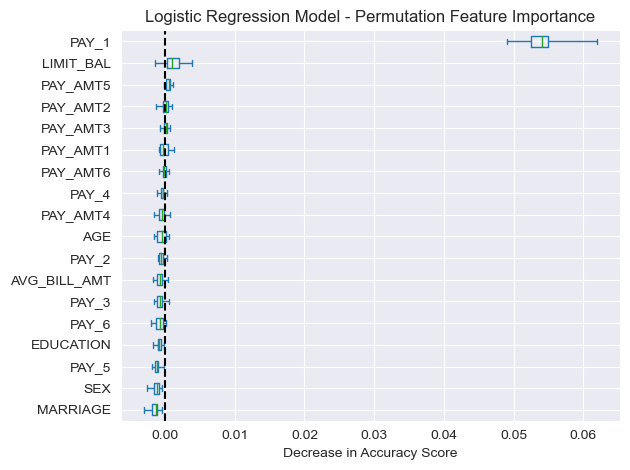

In [28]:
# Calculate and Plot Permutation Feature Importance for the Logistic Regression Model
lr_importance = permutation_importance(
    lr_model, X_test_scaled, y_test, n_repeats=20, random_state=1
)

sorted_importances_idx = lr_importance.importances_mean.argsort()
importances = pd.DataFrame(
    lr_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Logistic Regression Model - Permutation Feature Importance")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in Accuracy Score")
ax.figure.tight_layout()

# Save the Permutation Feature Importance as a PNG
plt.savefig('./Images/lr_feature_importance.png')

### Model 2: Random Forest

In [29]:
# Build a Random Forest Classifier and assign a random_state parameter of 1
rf_model = RandomForestClassifier(n_estimators = 100, random_state=1)

# Fit the model using the training data
rf_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
rf_prediction = rf_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Random Forest model
rf_acc_score = round(balanced_accuracy_score(y_test, rf_prediction), 2)
print(f"Random Forest Model Balanced Accuracy Score: {rf_acc_score}")

Random Forest Model Balanced Accuracy Score: 0.65



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.64      0.36      0.46      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



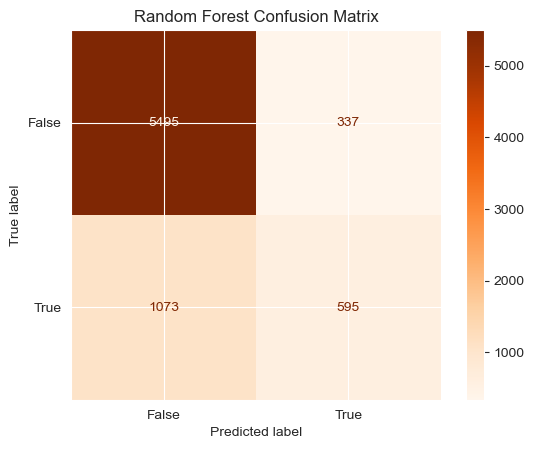

In [30]:
# Print the Confusion Matrix and the Classification Report for the Random Forest model
rf_confusion_matrix = confusion_matrix(y_test, rf_prediction)
rf_classification_report = classification_report(y_test, rf_prediction)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])
rf_cm_display.plot(cmap='Oranges')
rf_cm_display.ax_.set_title("Random Forest Confusion Matrix")
print('\nRandom Forest Classification Report:\n', rf_classification_report)

# Save the Confusion Matrix as a PNG
rf_cm_display.figure_.savefig('./Images/rf_confusion_matrix.png')

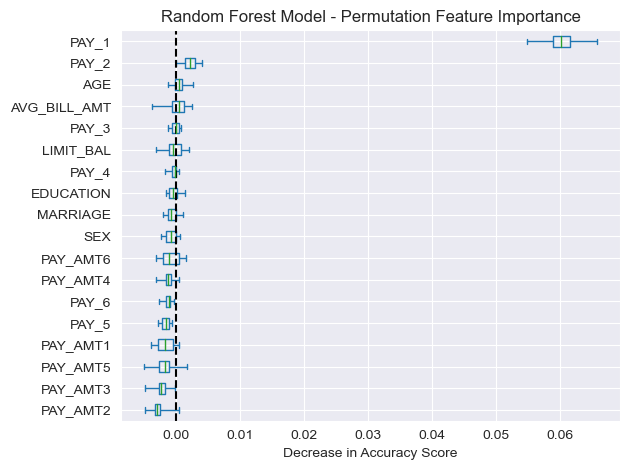

In [31]:
# Calculate and Plot Permutation Feature Importance for the Random Forest Model
rf_importance = permutation_importance(
    rf_model, X_test_scaled, y_test, n_repeats=20, random_state=1
)

sorted_importances_idx = rf_importance.importances_mean.argsort()
importances = pd.DataFrame(
    rf_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Random Forest Model - Permutation Feature Importance")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in Accuracy Score")
ax.figure.tight_layout()

# Save the Permutation Feature Importance as a PNG
plt.savefig('./Images/rf_feature_importance.png')

### Model 3: Naive Bayes

In [32]:
# Build a Gaussian Classifier
nb_model = GaussianNB()

# Fit the model using the training data
nb_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
nb_prediction = nb_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Naive Bayes model
nb_acc_score = round(balanced_accuracy_score(y_test, nb_prediction), 2)
print(f"Naive Bayes Model Balanced Accuracy Score: {nb_acc_score}")

Naive Bayes Model Balanced Accuracy Score: 0.69



Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      5832
           1       0.48      0.55      0.51      1668

    accuracy                           0.77      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.77      0.77      7500



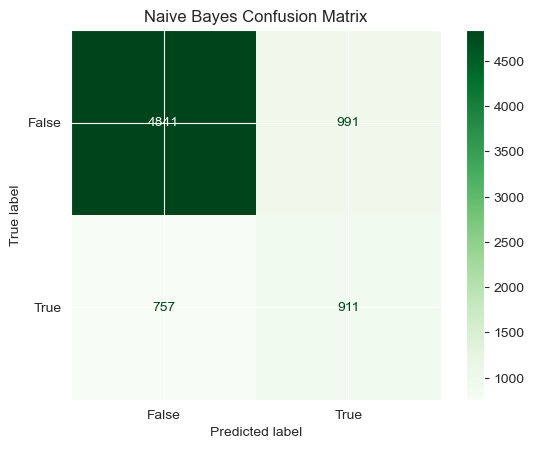

In [33]:
# Print the Confusion Matrix and the Classification Report for the Naive Bayes model
nb_confusion_matrix = confusion_matrix(y_test, nb_prediction)
nb_classification_report = classification_report(y_test, nb_prediction)
nb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])
nb_cm_display.plot(cmap='Greens')
nb_cm_display.ax_.set_title("Naive Bayes Confusion Matrix")
print('\nNaive Bayes Classification Report:\n', nb_classification_report)

# Save the Confusion Matrix as a PNG
nb_cm_display.figure_.savefig('./Images/nb_confusion_matrix.png')

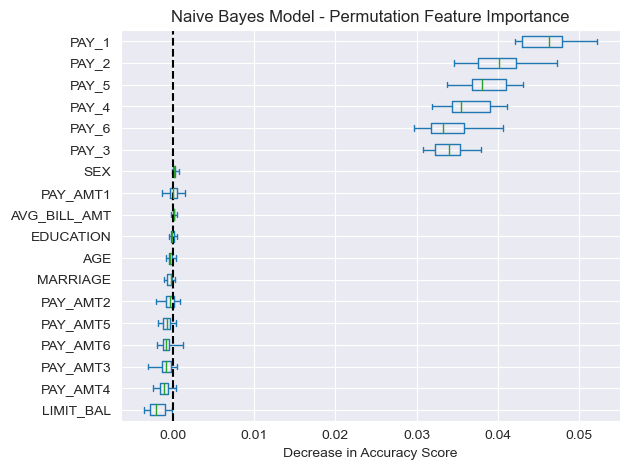

In [34]:
# Calculate and Plot Permutation Feature Importance for the Naive Bayes Model
nb_importance = permutation_importance(
    nb_model, X_test_scaled, y_test, n_repeats=20, random_state=1
)

sorted_importances_idx = nb_importance.importances_mean.argsort()
importances = pd.DataFrame(
    nb_importance.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Naive Bayes Model - Permutation Feature Importance")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in Accuracy Score")
ax.figure.tight_layout()

# Save the Permutation Feature Importance as a PNG
plt.savefig('./Images/nb_feature_importance.png')